In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print("All libraries loaded successfully")


All libraries loaded successfully


In [3]:
df = pd.read_csv('Dataset .csv',encoding="latin1")

print("Data loaded successfully.")
print(f"Dataset shape: {df.shape}")
print(df)

Data loaded successfully.
Dataset shape: (9551, 21)
      ï»¿Restaurant ID           Restaurant Name  Country Code  \
0              6317637          Le Petit Souffle           162   
1              6304287          Izakaya Kikufuji           162   
2              6300002    Heat - Edsa Shangri-La           162   
3              6318506                      Ooma           162   
4              6314302               Sambo Kojin           162   
...                ...                       ...           ...   
9546           5915730              NamlÛ± Gurme           208   
9547           5908749         Ceviz Aï¿½ï¿½acÛ±           208   
9548           5915807                     Huqqa           208   
9549           5916112         Aï¿½ï¿½ï¿½k Kahve           208   
9550           5927402  Walter's Coffee Roastery           208   

                  City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1

In [4]:

df.columns


Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.rename(columns=lambda x: x.strip().replace('ï»¿', ''), inplace=True)
df.info()
df.isnull().sum()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:

df['Cuisines'] = df['Cuisines'].fillna('Unknown')

cols_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 
                'Address', 'Locality', 'Locality Verbose', 'Switch to order menu', 
                'Rating color', 'Rating text', 'Currency']


df_model = df.drop(columns=cols_to_drop)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Has Table booking', 'Has Online delivery', 
                    'Is delivering now', 'Cuisines']

for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])


print("Data prepared for modeling:")
df_model.head()

Data prepared for modeling:


,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,121.027535,14.565443,920,1100,1,0,0,3,4.8,314
1,121.014101,14.553708,1111,1200,1,0,0,3,4.5,591
2,121.056831,14.581404,1671,4000,1,0,0,4,4.4,270
3,121.056475,14.585318,1126,1500,0,0,0,4,4.9,365
4,121.057508,14.584450,1122,1500,1,0,0,4,4.8,229


In [7]:
from sklearn.model_selection import train_test_split


X = df_model.drop('Aggregate rating', axis=1)
y = df_model['Aggregate rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data Split Successfully!
Training set shape: (7640, 9)
Testing set shape: (1911, 9)


In [8]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model Training Completed.")

Model Training Completed.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")
print("-" * 30)
if r2 > 0.9:
    print("Result: Excellent Performance! The model explains over 90% of the variance.")
else:
    print("Result: Good Performance.")

Mean Squared Error (MSE): 0.0882
R-squared Score (R2): 0.9613
------------------------------
Result: Excellent Performance! The model explains over 90% of the variance.


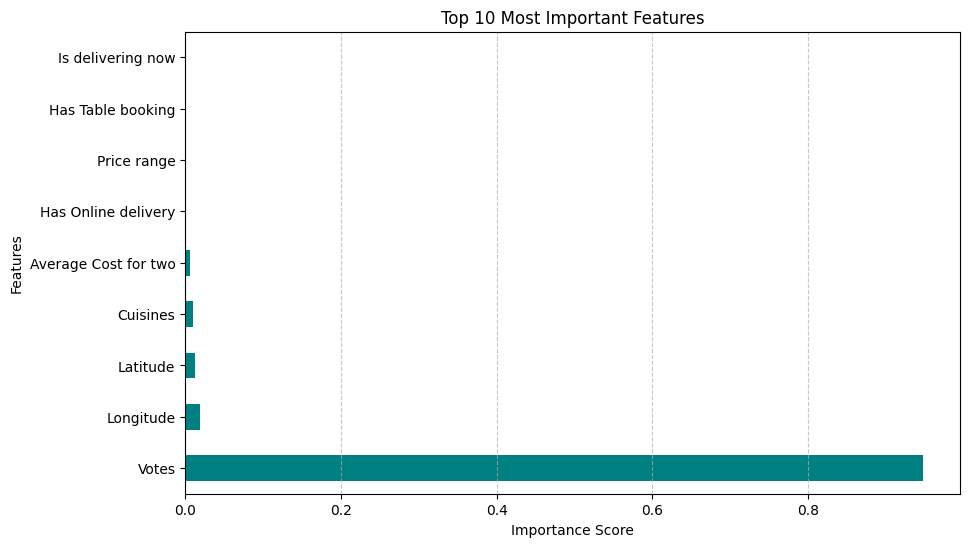

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

feature_importance = pd.Series(model.feature_importances_, index=X.columns)

feature_importance.nlargest(10).plot(kind='barh', color='teal')

plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

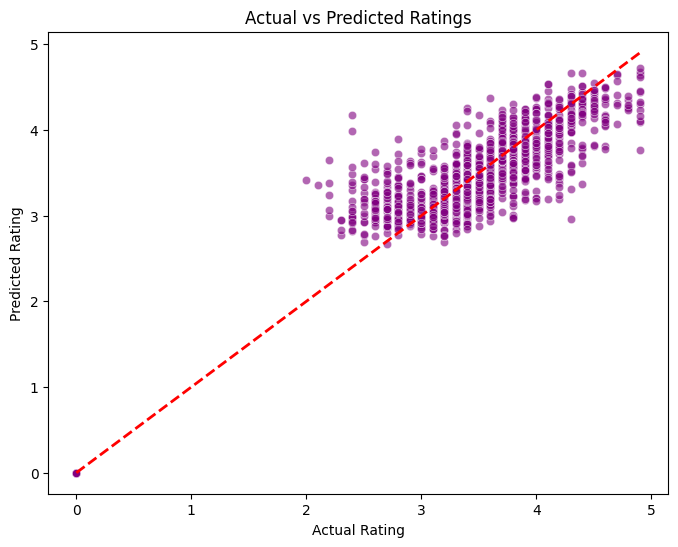

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [12]:
import pandas as pd

print("--- Predict Restaurant Rating ---")


votes = int(input("Enter Number of Votes (e.g., 150): "))
avg_cost = int(input("Enter Average Cost for two (e.g., 800): "))
price_range = int(input("Enter Price Range (1-4): "))
table_booking = input("Has Table Booking? (Yes/No): ").strip().lower()
online_delivery = input("Has Online Delivery? (Yes/No): ").strip().lower()
delivering_now = input("Is Delivering Now? (Yes/No): ").strip().lower()
longitude = float(input("Enter Longitude (e.g., 77.2): "))
latitude = float(input("Enter Latitude (e.g., 28.6): "))


data = {
    'Votes': votes,
    'Average Cost for two': avg_cost,
    'Price range': price_range,
    'Has Table booking': 1 if table_booking == 'yes' else 0,
    'Has Online delivery': 1 if online_delivery == 'yes' else 0,
    'Is delivering now': 1 if delivering_now == 'yes' else 0,
    'Longitude': longitude,
    'Latitude': latitude,
    'Cuisines': 0  
}


user_df = pd.DataFrame([data])
user_df = user_df[X_train.columns]


prediction = model.predict(user_df)
print(f"\n>>> Predicted Aggregate Rating: {prediction[0]:.1f} / 5.0")



--- Predict Restaurant Rating ---

>>> Predicted Aggregate Rating: 3.8 / 5.0
